In [85]:
import numpy as np 
import scipy.linalg as la 
import matplotlib.pyplot as plt

import sys,os
from quspin.operators import hamiltonian,quantum_operator # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis

def build_TFIZ(L,Jxx,Jz,Jx,pbc=False):
    """
    builds tfim Hamiltonian
    """
    ## Setup basis
    basis = spin_basis_1d(L,pauli=True) # and positive parity sector
    

    ## Operator lists
    if pbc==True:
        J_xx = [[Jxx,i,(i+1)%L] for i in range(L)] # OBC
        J_x = [[Jx,i] for i in range(L)] # OBC
        J_z = [[Jz,i] for i in range(L)] # OBC
    else:
        J_xx = [[Jxx,i,i+1] for i in range(L-1)] # OBC
        J_x = [[Jx,i] for i in range(L)] # OBC
        J_z = [[Jz,i] for i in range(L)] # OBC    # static and dynamic lists
        
    static = [["xx",J_xx],["x",J_x],["z",J_z]]
    dynamic=[]

    return hamiltonian(static,dynamic,basis=basis,dtype=np.float64)

def build_XXZ(L,J,Delta,pbc=False):
    """
    builds tfim Hamiltonian
    """
    ## Setup basis
    basis = spin_basis_1d(L,pauli=True) # and positive parity sector
    

    ## Operator lists
    if pbc==True:
        J_xx = [[J,i,(i+1)%L] for i in range(L)] # OBC
        J_yy = [[J,i,(i+1)%L] for i in range(L)] # OBC
        J_zz = [[Delta * J,i,(i+1)%L] for i in range(L)] # OBC
    else:
        J_xx = [[J,i,(i+1)%L] for i in range(L-1)] # OBC
        J_yy = [[J,i,(i+1)%L] for i in range(L-1)] # OBC
        J_zz = [[Delta * J,i,(i+1)%L] for i in range(L-1)] # OBC        
    static = [["xx",J_xx],["yy",J_yy],["zz",J_zz]]
    dynamic=[]

    return hamiltonian(static,dynamic,basis=basis,dtype=np.float64)

def build_SDIsing(L,Jxx,Jx,V,pbc=False):
    """
    builds tfim Hamiltonian
    """
    ## Setup basis
    basis = spin_basis_1d(L,pauli=True) # and positive parity sector
    

    ## Operator lists
    if pbc==True:
        J_xx = [[Jxx,i,(i+1)%L] for i in range(L)] # OBC
        J_x = [[Jx,i] for i in range(L)] # OBC
        V_zz = [[V,i,(i+2)%L] for i in range(L)] # OBC
        V_xx = [[V,i,(i+1)%L] for i in range(L)] # OBC
    else:
        J_xx = [[Jxx,i,i+1] for i in range(L-1)] # OBC
        J_x = [[Jx,i] for i in range(L)] # OBC
        V_zz = [[V,i,(i+2)%L] for i in range(L-2)] # OBC
        V_xx = [[V,i,(i+1)%L] for i in range(L-1)] # OBC
        
    static = [["xx",J_xx],["x",J_x],["zz",V_zz],["xx",V_xx]]
    dynamic=[]

    return hamiltonian(static,dynamic,basis=basis,dtype=np.float64)



In [92]:
### model parameters ###
L=12 # system size
Jxx = 1
Jz = 0.5
Jx = 0.5

Ts = np.arange(0.2,2.2,0.2) # temperatures (sweep)

# initialize variables
Fs = np.zeros(Ts.size) # free energy
Es = np.zeros(Ts.size) # mean energy
Ss = np.zeros(Ts.size) # entropy

# build/diagonalize H
#H = build_TFIZ(L,Jxx,Jz,Jx,pbc=False)
H = build_SDIsing(L,-1,-1,1,pbc=True)
basis = spin_basis_1d(L,pauli=0.5) # and positive parity sector
Hdense = H.todense()
E,V = la.eigh(Hdense) # find spectrum

# compute free-energy for T-Sweep
for i_T,T in enumerate(Ts):
    boltz_wts= np.exp(-E/T) # boltzmann weights
    Z = np.sum(boltz_wts) # partition function
    rho_diag = boltz_wts/Z # density matrix (in Energy eigenbasis)
    Es[i_T] = np.sum(E*rho_diag) 
    Ss[i_T] = -np.sum(rho_diag*np.log(rho_diag)) # free energy

Fs = Es - Ts*Ss


Hermiticity check passed!


<ipython-input-85-9d6492c53a3a>:77: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.basis_1d.spin.spin_basis_1d'>, to turn off this warning set check_symm=False in hamiltonian
  return hamiltonian(static,dynamic,basis=basis,dtype=np.float64)


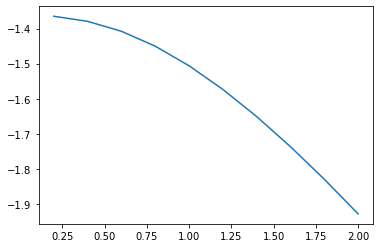

In [73]:
plt.plot(Ts,Fs/L)

In [93]:
Fs/L

array([-1.29581899, -1.31629064, -1.34307028, -1.37955529, -1.42837276,
       -1.48998489, -1.5633271 , -1.64672195, -1.73845586, -1.83702027])